# Magnetic Energy Calculations
The energy of an induced paramagnetic magnetic moment in an external field is

$U_{m} = - \frac{1}{2} \mathbf{m}\cdot\mathbf{B}$

At room temperature, local dipolar fields, and exchange interactions from neighbouring rare earth atoms in a DOTA-BTA assembly are negligible. The former is confirmed with detailed calculations elaborated below, and the latter from SQUID magnetometry, which showed an exchange interaction of -0.7 K (see main text). Furthermore, we can assume a linear Curie law dependence of these atomic moments for an applied magnetic field $\mathbf{B}$, giving an effective atomic moment, $m_{eff}$, in units of Bohr magneton, ${\mu_B}$

$m_{eff} =   \frac{{\mu_B}^2 m_{atom}^2 B}{3 {k_B} T}$

where $m_{atom}$ is the 0 K atomic moment also in units of ${\mu_B}$. In this scheme, $\mathbf{m}$ is always collinear with $\mathbf{B}$, and the magnetic energy of a monomer, with three rare earth atoms is thus

$U_{mono} =   - \frac{{\mu_B}^2 m_{atom}^2 B^2}{ 2{k_B} T}$


We define a critical length $L_c$, as the minimum length where the magnitude of the magnetic energy of an assembly is sufficient to equal or overcome thermal energy 

$L_c = \frac{d \, {k_B} T}{\left|U_{mono}\right|}$

where $d$ is the inter-layer spacing, and the critical monomer number  is $ N_c = \left \lceil L_c/ d \right \rceil$. Alternatively, the critical length can be written as

$L_c =  2d\left(\frac{ {k_B} T}{\mu_B m_{atom} B}  \right)^2$


To generate the table below, we take $d$ = 0.35 nm, $B$ = 2 T, and $T$ = 298 K. The table units are: m: $\mu_B$, m_eff: %, Um: J mol$^{-1}$, Lc: nm, Nc: none.

In [1]:
%matplotlib inline
# %matplotlib notebook
%config InlineBackend.figure_format ='retina'
%config IPCompleter.greedy=True
import matplotlib.pyplot as plt
import pandas as pd
from mag_energy import * # local library, see source code for API docstrings

In [4]:
d = 0.35 # interlayer spacing in nm
B = 2 # applied field in T
T = 298 # temperature in K
Monomer.reset()

# 3d Transition Metal Ions
Ti3V4 = Monomer('Ti3+,V4+',d,1.7,B,T)
Ti2V3 = Monomer('Ti2+,V3+',d, 2.8,B,T)
V2Cr3 = Monomer('V2+,Cr3+',d, 3.8,B,T)
Cr2Mn3 = Monomer('Cr2+,Mn3+',d, 4.9,B,T)
Mn2Fe3 = Monomer('Mn2+,Fe3+',d, 5.9,B,T)
Fe2Co3 = Monomer('Fe2+,Co3+',d, 5.4,B,T)
Co2Ni3 = Monomer('Co2+,Ni3+',d, 4.8,B,T)
Ni2 = Monomer('Ni2+',d, 3.2,B,T)
Cu2 = Monomer('Cu2+',d, 1.9,B,T)

# Rare Earth Ions
Ce = Monomer('Ce3+',d,2.5,B,T)
Pr = Monomer('Pr3+',d,3.5,B,T)
Nd = Monomer('Nd3+',d,3.4,B,T)
Sm = Monomer('Sm3+',d,1.7,B,T)
Eu = Monomer('Eu3+',d,3.4,B,T)
Gd = Monomer('Gd3+',d,8.9,B,T)
Tb = Monomer('Tb3+',d,9.8,B,T)
Dy = Monomer('Dy3+',d,10.6,B,T)
Ho = Monomer('Ho3+',d,10.4,B,T)
Er = Monomer('Er3+',d,9.5,B,T)
Tm = Monomer('Tm3+',d,7.6,B,T)
Yb = Monomer('Yb3+',d,4.5,B,T)

# prepare a dataframe
out_table = pd.DataFrame()

# add data of interest to dataframe
for ob in Monomer.instances:
    tmp_dict = {
        'name':ob.name,
        'm':ob.m,
        'm_eff':ob.m_eff*100/ob.m,
        'Um':ob.Um*Na,
        'dG':ob.dG*Na,
        'Lc':ob.Lc,
        'Nc':ob.Nc  
    }
    out_table = out_table.append(pd.DataFrame(tmp_dict, index=[0]), ignore_index=True)

# reformat output
out_table['m_eff'] = out_table['m_eff'].map('{:.2f}'.format)
out_table['Lc'] = out_table['Lc'].map('{:.0f}'.format)
out_table['Um'] = out_table['Um'].map('{:.2f}'.format)
out_table['dG'] = out_table['dG'].map('{:.2f}'.format)

out_table

,name,m,m_eff,Um,dG,Lc,Nc
0,"Ti3+,V4+",1.7,0.26,-0.07,-0.04,11918,34052
1,"Ti2+,V3+",2.8,0.42,-0.20,-0.10,4393,12553
2,"V2+,Cr3+",3.8,0.57,-0.36,-0.18,2385,6816
3,"Cr2+,Mn3+",4.9,0.74,-0.60,-0.30,1435,4099
4,"Mn2+,Fe3+",5.9,0.89,-0.88,-0.44,989,2828
5,"Fe2+,Co3+",5.4,0.81,-0.73,-0.37,1181,3375
6,"Co2+,Ni3+",4.8,0.72,-0.58,-0.29,1495,4272
7,Ni2+,3.2,0.48,-0.26,-0.13,3364,9611
8,Cu2+,1.9,0.29,-0.09,-0.05,9541,27261
9,Ce3+,2.5,0.38,-0.16,-0.08,5511,15746


Uncomment below to export the table to excel, latex, or markdown.

In [9]:
# out_table.to_excel('si_table1_mag_energy.xlsx',index=False)
# print(out_table.to_latex(index=False))
# print(out_table.to_markdown(index=False))

Thermal energy at 298 K

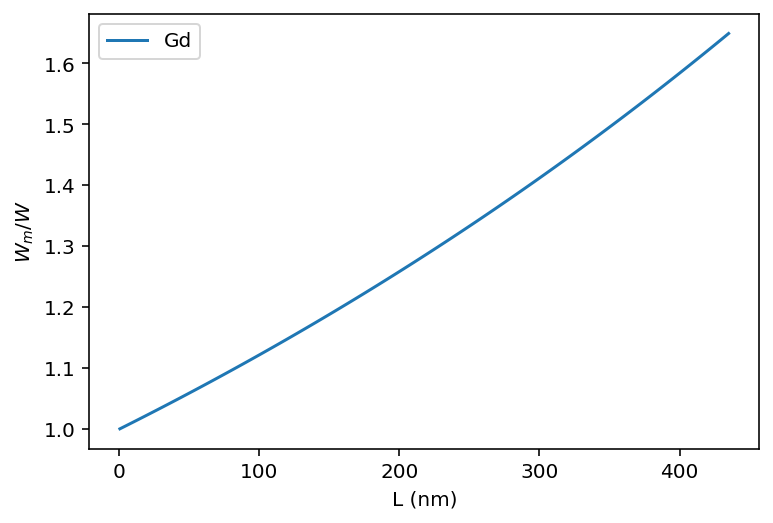

In [19]:
plt.close('all')
x = np.linspace(1,Gd.Nc,100)
y = np.exp(-Gd.dG*x/kB/T)
fig, ax = plt.subplots()
plt.plot(x*Gd.d,y,label=r'Gd')
plt.xlabel('L (nm)')
plt.ylabel(r'$W_m/W$')
plt.legend(loc='best')
plt.show()


Note: at 298 K, the induced magnetic magnetic moment is overestimated by .2% when ignoring the exchange interaction temperature (= -0.7 K).